# Homework 8

In [ ]:
# Install TensorFlow 2.17.1
!pip install tensorflow==2.17.1

In [67]:
# Import necessary libraries
import numpy as np
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


tf.__version__

'2.17.1'

In [68]:
# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

train_dir = 'data/train'
test_dir = 'data/test'


In [69]:
#Build the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [70]:
# Compile the model
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['accuracy'])

## Question 1
Since we have a binary classification problem, what is the best loss function for us? Binary Crossentropy is the most suitable loss function for binary classification tasks. It measures the performance of a classification model whose output is a probability value between 0 and 1. This loss function is specifically designed for scenarios where each example belongs to one of two classes.

- binary_crossentropy

In [71]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

## Question 2¶
What's the total number of parameters of the model?
- 20072512

In [72]:
# Question 2: Total number of parameters
total_params = model.count_params()
print("Total Parameters:", total_params)

Total Parameters: 20073473


## Generators and Training
For the next two questions, use the following data generator for both train and test sets:

- ImageDataGenerator(rescale=1./255)
- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets. For training use .fit() with the following params:

In [73]:
# Define the training data generator without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Define the test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,        
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',        # For binary classification
    shuffle=True,
    seed=SEED
)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,         
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',        # For binary classification
    shuffle=True,
    seed=SEED
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [74]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.5677 - loss: 0.6963 - val_accuracy: 0.6418 - val_loss: 0.6363
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6765 - loss: 0.6082 - val_accuracy: 0.5721 - val_loss: 0.7299
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7065 - loss: 0.5691 - val_accuracy: 0.6567 - val_loss: 0.5943
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.6834 - loss: 0.5550 - val_accuracy: 0.6716 - val_loss: 0.5921
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.7452 - loss: 0.5088 - val_accuracy: 0.6368 - val_loss: 0.6494
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7579 - loss: 0.4902 - val_accuracy: 0.6816 - val_loss: 0.5811
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7671 - loss: 0.4850 - val_accuracy: 0.6766 - val_loss: 0.5812
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8327 - loss: 0.4300 - val_accuracy: 0.

## Question 3
What is the median of training accuracy for all the epochs for this model?
- 0.72

In [75]:
# Question 3: Median of training accuracy
median_accuracy = np.median(history.history['accuracy'])
print("Median Training Accuracy:", median_accuracy)

Median Training Accuracy: 0.75


## Question 4
What is the standard deviation of training loss for all the epochs for this model?
- 0.068

In [76]:
# Question 4: Standard deviation of training loss
std_dev_loss = np.std(history.history['loss'])
print("Standard Deviation of Training Loss:", std_dev_loss)

Standard Deviation of Training Loss: 0.08408676962331102


In [77]:
# Data Augmentation for Questions 5 and 6
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the augmented training generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,        
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True,
    seed=SEED
)

# Continue training the existing model for 10 more epochs with augmentation
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)


Found 800 images belonging to 2 classes.
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - accuracy: 0.6773 - loss: 0.6292 - val_accuracy: 0.6915 - val_loss: 0.5589
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - accuracy: 0.7070 - loss: 0.5763 - val_accuracy: 0.7065 - val_loss: 0.5597
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.7142 - loss: 0.5670 - val_accuracy: 0.7363 - val_loss: 0.5562
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.7075 - loss: 0.5529 - val_accuracy: 0.7313 - val_loss: 0.5455
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.7372 - loss: 0.5644 - val_accuracy: 0.7711 - val_loss: 0.5230
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.7436 - loss: 0.5308 - val_accuracy: 0.7761 - val_loss: 0.5260
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.7049 - loss: 0.5648 - val_accuracy: 0.7164 - val_loss: 0.5803
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - a

## Question 5
Let's train our model for 10 more epochs using the same code as previously.

Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.56

In [78]:
# Question 5: Mean of test loss for all epochs with augmentation
mean_test_loss = np.mean(history_augmented.history['val_loss'])
print("Mean of Test Loss:", mean_test_loss)

Mean of Test Loss: 0.5529901564121247


## Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?
- 0.71

In [79]:
# Question 6: Average of test accuracy for the last 5 epochs with augmentation
last_five_accuracies = history_augmented.history['val_accuracy'][-5:]
average_test_accuracy = np.mean(last_five_accuracies)
print("Average Test Accuracy (Last 5 Epochs):", average_test_accuracy)


Average Test Accuracy (Last 5 Epochs): 0.7383084535598755


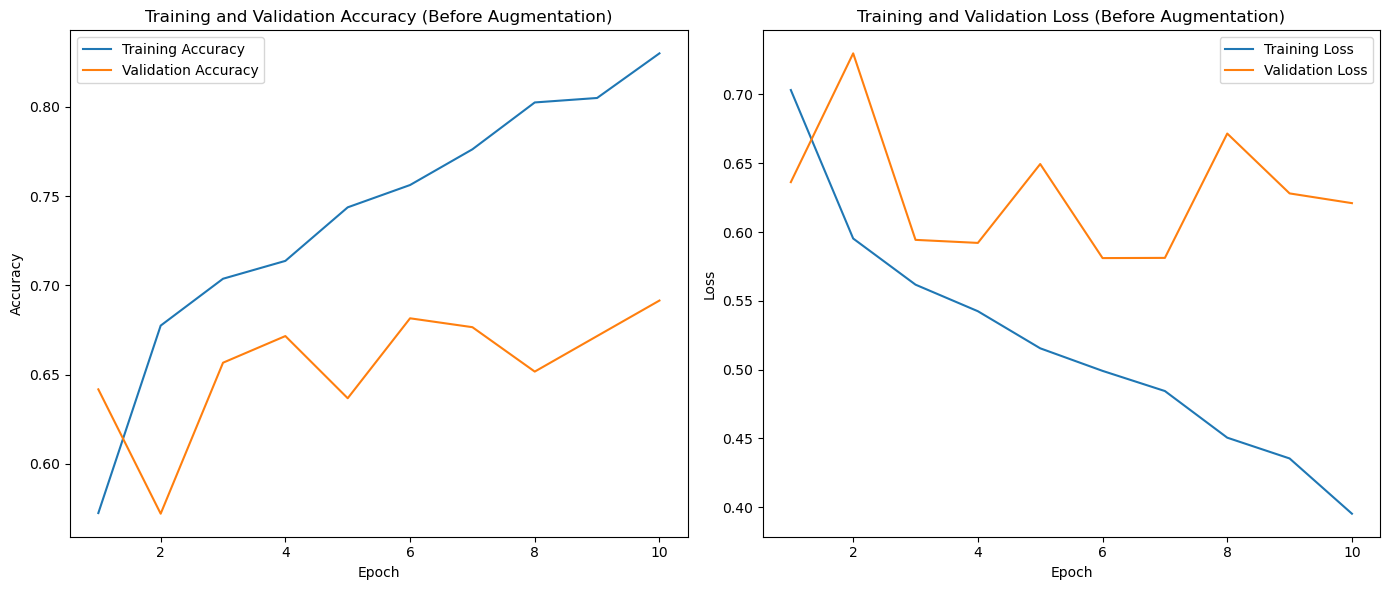

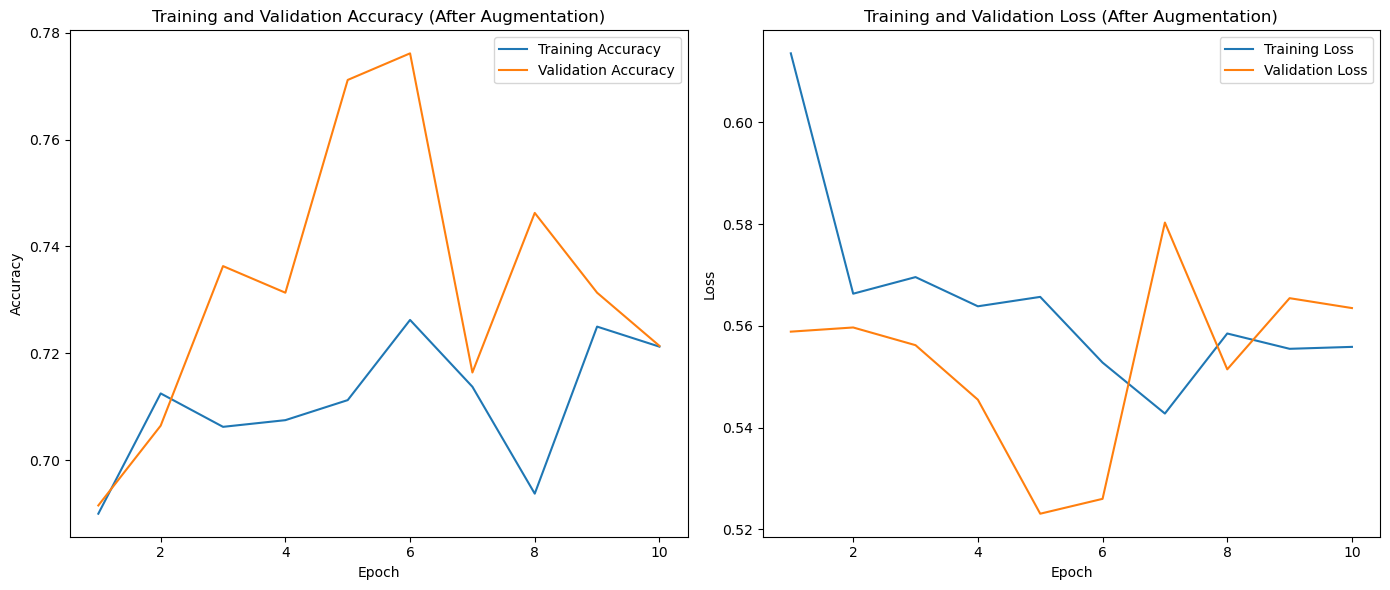

In [80]:
import matplotlib.pyplot as plt

# -----------------------------------------------
# Plot Training Progress Before Data Augmentation
# -----------------------------------------------

# Extract training and validation metrics from the initial training
epochs_initial = range(1, len(history.history['accuracy']) + 1)
training_accuracy_initial = history.history['accuracy']
validation_accuracy_initial = history.history['val_accuracy']
training_loss_initial = history.history['loss']
validation_loss_initial = history.history['val_loss']

# Create a figure for initial training
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_initial, training_accuracy_initial, label='Training Accuracy')
plt.plot(epochs_initial, validation_accuracy_initial, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Before Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_initial, training_loss_initial, label='Training Loss')
plt.plot(epochs_initial, validation_loss_initial, label='Validation Loss')
plt.title('Training and Validation Loss (Before Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ----------------------------------------------
# Plot Training Progress After Data Augmentation
# ----------------------------------------------

# Extract training and validation metrics from the augmented training
epochs_augmented = range(1, len(history_augmented.history['accuracy']) + 1)
training_accuracy_augmented = history_augmented.history['accuracy']
validation_accuracy_augmented = history_augmented.history['val_accuracy']
training_loss_augmented = history_augmented.history['loss']
validation_loss_augmented = history_augmented.history['val_loss']

# Create a figure for augmented training
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_augmented, training_accuracy_augmented, label='Training Accuracy')
plt.plot(epochs_augmented, validation_accuracy_augmented, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (After Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_augmented, training_loss_augmented, label='Training Loss')
plt.plot(epochs_augmented, validation_loss_augmented, label='Validation Loss')
plt.title('Training and Validation Loss (After Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


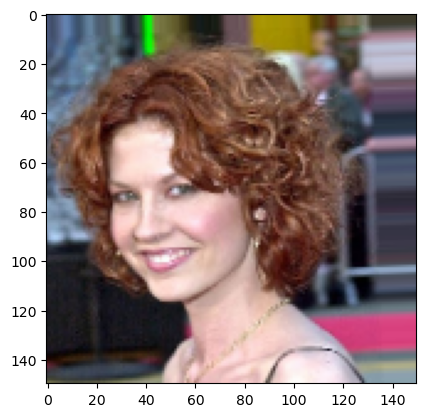

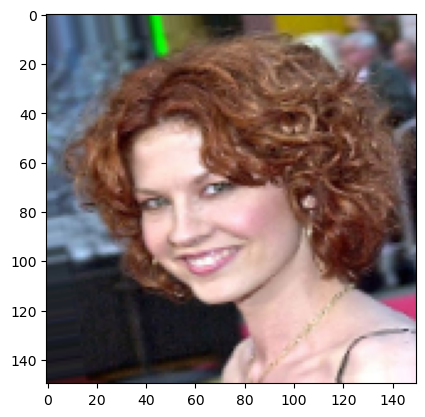

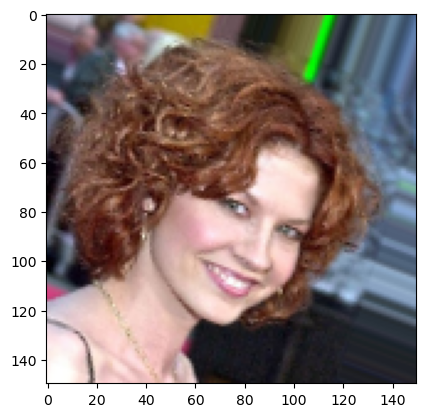

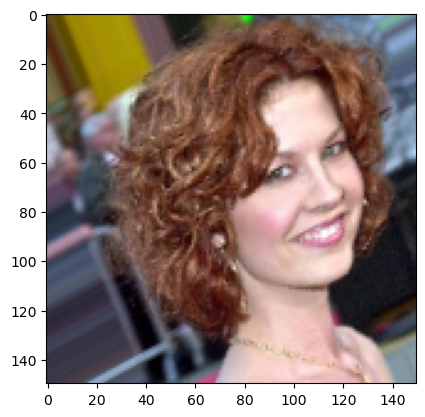

In [85]:
import os
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_dir+"/curly", fname) for
    fname in os.listdir(train_dir+"/curly")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in train_datagen_augmented.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

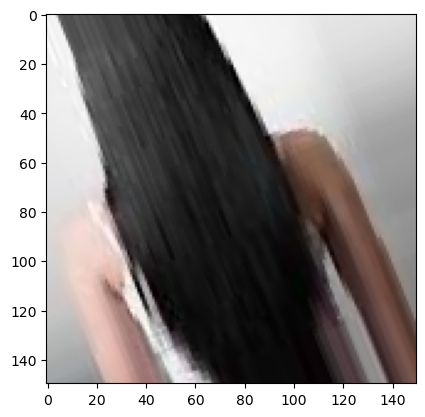

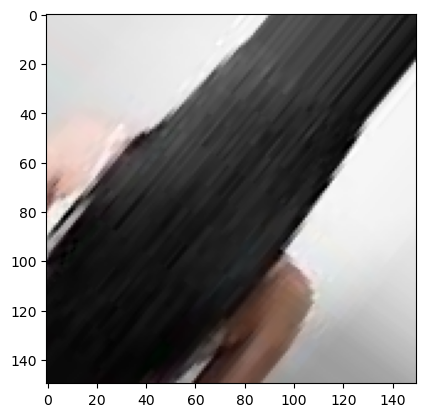

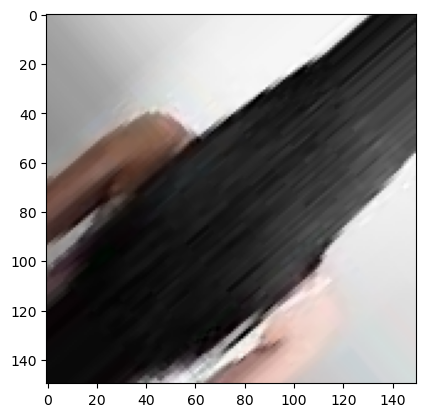

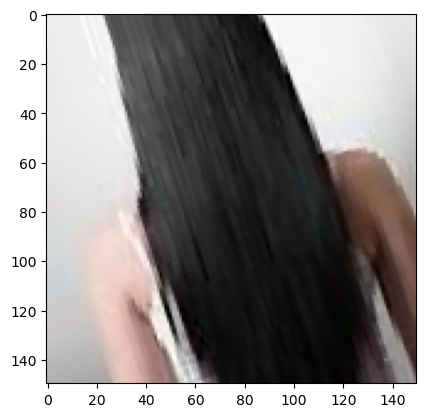

In [86]:
import os
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_dir+"/straight", fname) for
    fname in os.listdir(train_dir+"/straight")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in train_datagen_augmented.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()